<a href="https://colab.research.google.com/github/deepachandradubai-oss/ai-grocery-recommender/blob/main/top_1000_instagramers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# This 'reads' the file into Python's memory
df = pd.read_csv('top_1000_instagrammers.csv')

# This shows the first few rows of your Instagram data
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462.9M,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2M,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6M,United States,3M,4.9M
3,arianagrande,4,Music,321.4M,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147M,United States,4.3M,5.8M


In [7]:
# Check how many empty spots are in each column
print(df.isnull().sum())

Name                     0
Rank                     0
Category                84
Followers                0
Audience Country        14
Authentic Engagement     0
Engagement Avg.          0
dtype: int64


In [9]:
# 1. Define the cleaning machine
def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper()
        if 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
    return value

# 2. Apply the machine to our columns
df['Followers_Count'] = df['Followers'].apply(convert_to_number)
df['Engagement_Avg_Count'] = df['Engagement Avg.'].apply(convert_to_number)

# 3. Look at the new numbers!
print(df[['Name', 'Followers_Count', 'Engagement_Avg_Count']].head())




            Name  Followers_Count  Engagement_Avg_Count
0      cristiano      462900000.0             6600000.0
1       leomessi      347200000.0             4800000.0
2  kendalljenner      247600000.0             4900000.0
3   arianagrande      321400000.0             3400000.0
4        zendaya      147000000.0             5800000.0


In [10]:

avg_followers = df['Followers_Count'].mean()
print(f"The average top Instagrammer has {avg_followers:,.0f} followers!")



The average top Instagrammer has 26,044,600 followers!


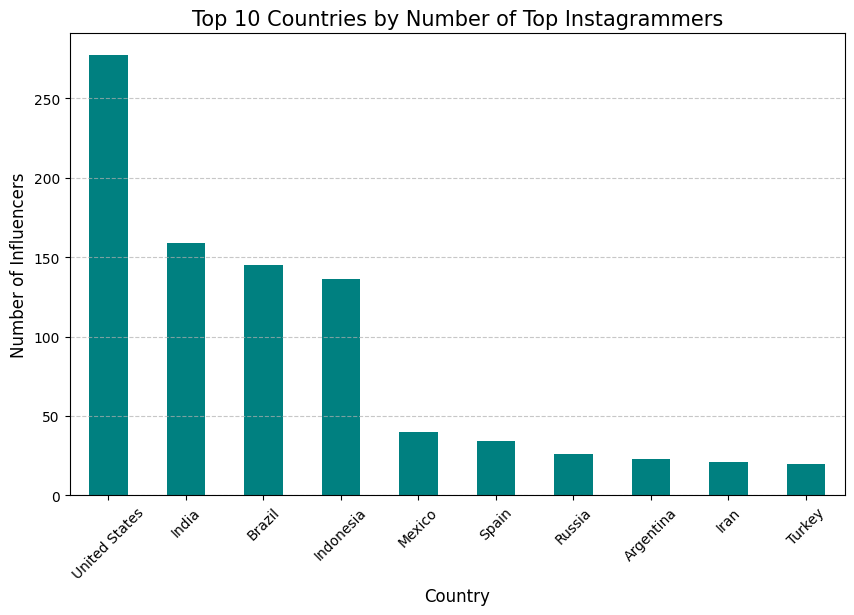

In [11]:
import matplotlib.pyplot as plt

# 1. Count how many Instagrammers are in each country
# We take the top 10 to keep the chart clean
country_counts = df['Audience Country'].value_counts().head(10)

# 2. Create the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='teal')

# 3. Add labels so people know what they are looking at
plt.title('Top 10 Countries by Number of Top Instagrammers', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Influencers', fontsize=12)
plt.xticks(rotation=45) # Tilts the names so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 4. Show the chart
plt.show()



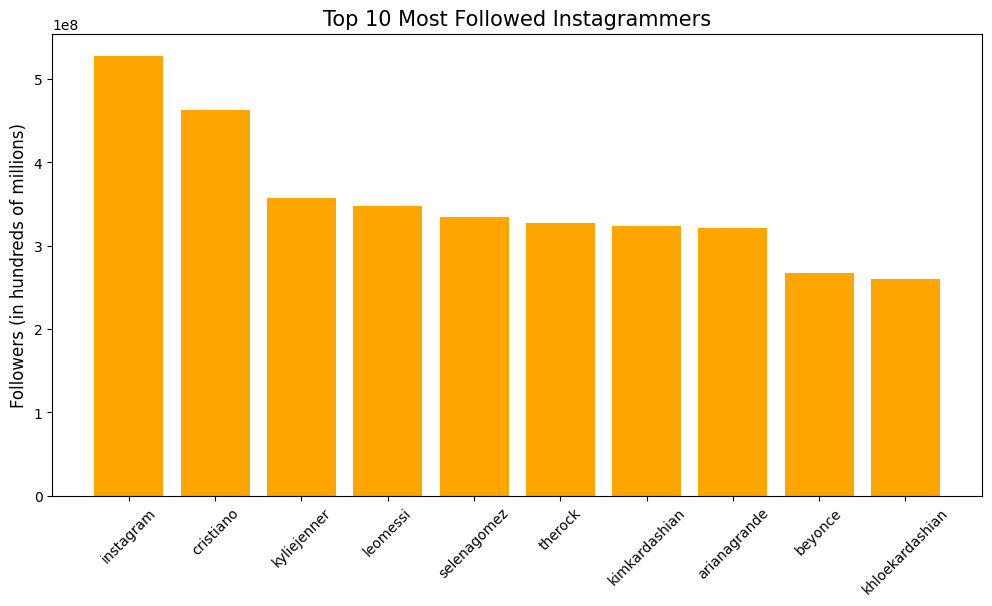

In [12]:
import matplotlib.pyplot as plt

# 1. Clean the followers column (turning M into millions)
def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper()
        if 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
    return value

df['Followers_Count'] = df['Followers'].apply(convert_to_number)

# 2. Sort by followers and get the top 10
top_10_followed = df.sort_values(by='Followers_Count', ascending=False).head(10)

# 3. Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_followed['Name'], top_10_followed['Followers_Count'], color='orange')
plt.title('Top 10 Most Followed Instagrammers', fontsize=15)
plt.ylabel('Followers (in hundreds of millions)', fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [14]:
# Question A: Who is the #1 Instagrammer?
rank_1 = df[df['Rank'] == 1]['Name'].iloc[0]
print(f"🏆 The #1 Ranked Instagrammer is: {rank_1}")

# Question B: What is the most common Category in the Top 10?
top_10_categories = df.head(10)['Category'].value_counts()
print("\n📊 Top Categories in the Top 10:")
print(top_10_categories)



🏆 The #1 Ranked Instagrammer is: cristiano

📊 Top Categories in the Top 10:
Category
Music                               2
Sports with a ball                  1
Sports with a ballFamily            1
ModelingFashion                     1
Cinema & Actors/actressesFashion    1
FashionBeauty                       1
FashionModelingBeauty               1
MusicLifestyle                      1
Name: count, dtype: int64
